In [260]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat

In [261]:
class LRegression:
    def __init__(self, x, y, color, title, filename, xlabel, ylabel):
        self.x = x
        self.y = y
        self.x_mean = stat.mean(x)
        self.y_mean = stat.mean(y)

        self.color = color
        self.title = title
        self.filename = filename
        self.xlabel = xlabel
        self.ylabel = ylabel
    
    def get(self):
        #definicao do coeficiente angular (a):
        a_def = 0
        for i in range(len(self.x)):
            a_def += ((self.x[i]-self.x_mean) * (self.y[i]-self.y_mean))
        a_div = 0
        for i in range(len(self.x)):
            a_div += pow((self.x[i] - self.x_mean), 2)
        a = (a_def/a_div)
        b = self.y_mean - (self.x_mean * a) #definicao do coeficiente linear (b)
        
        #incerteza de Y
        incY = 0
        for i in range(len(self.x)):
            incY += pow((self.y[i] - (a * self.x[i] + b)), 2)
        
        incY *= (1/(len(self.x)-2))
        incY = pow(incY, 0.5)
    	
        #incerteza de a:
        incA = 0
        incA = pow(a_div, -1)
        incA = pow(incA, 0.5)
        incA *= incY
        
        #incerteza de b:
        incB = 0
        for i in range(len(self.x)):
            incB += (pow(self.x[i], 2))

        incB*= (1/len(self.x))
        incB = incB/a_div
        incB = pow(incB, 0.5)
        incB*= incY

        y=[]
        for i in range(len(self.x)):
            y.append(a*self.x[i]+b)
       
        
        plt.plot(self.x, self.y, 'k^', label='Dados coletados')
        plt.plot(self.x, y, self.color, label=f'Regressão linear (y = {a :.6f}x + {b :.6f})')
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.grid(True)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.savefig(self.filename, dpi=100, edgecolor="#04253a")
        plt.show() #plot do grafico

        return a, b, incA, incB, incY

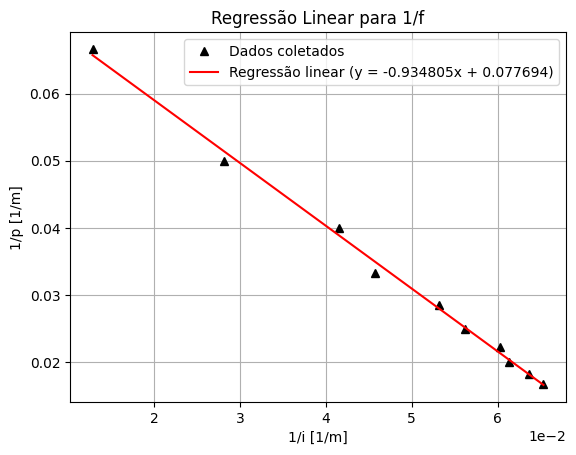

Foco: 12.9 ± 0.2 [cm]


In [262]:
ip = [0.06667,0.05000,0.04000,0.03333,0.02857,0.02500,0.02222,0.02000,0.01818,0.01667]
ii = [0.01279,0.02817,0.04149,0.04566,0.05319,0.05618,0.06024,0.06135,0.06369,0.06536]

reg_foco = LRegression(ii, ip, 'r-', "Regressão Linear para 1/f", 'f_reg.jpg', '1/i [1/m]', '1/p [1/m]')
a, b, incA, incB, incY = reg_foco.get()
foco = 1/b
incFoco = (incB/pow(b, 2))
print(f'Foco: {foco :.1f} ± {incFoco :.1f} [cm]')

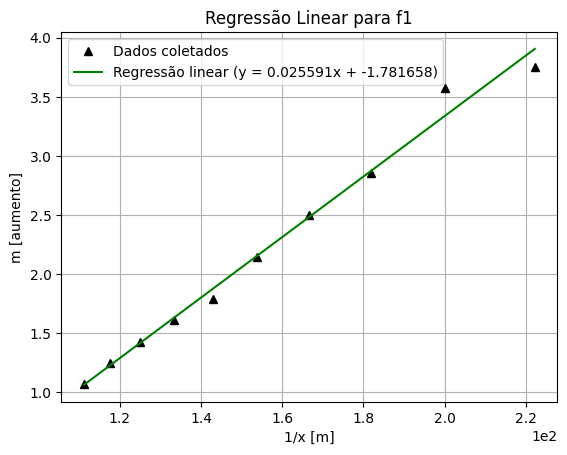

F1: 0.02559 ± 0.00095 [m]


In [263]:
x = [4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0] #cm
for i in range(len(x)):
    x[i] = 1/(x[i]/1000)


m = [3.7500,3.5714,2.8571,2.5000,2.1429,1.7857,1.6071,1.4286,1.2500,1.0714] #aumento, não possui unidade


micro_reg = LRegression(x, m, 'g-', "Regressão Linear para f1", 'f1_reg.jpg', '1/x [m]', 'm [aumento]')
a, b, incA, incB, incY = micro_reg.get()
f1 = a
print(f'F1: {(f1) :.5f} ± {((incA)) :.5f} [m]')

# Dioptro

[ 7 15 20 25 27 37 40]
[15 29 30 46 47 68 77]


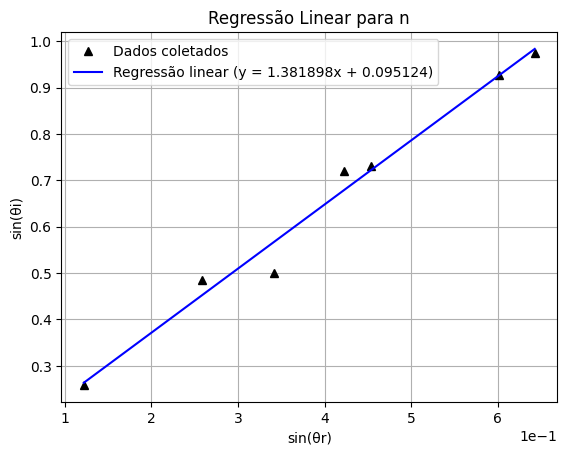

a = 1.3819, b = 0.10, σa = 0.0854, σb = 0.04, σy = 0.0
n = 1.38 ± 0.1


In [264]:
thetaINC   = np.sort([ 40, 25, 15, 7, 20, 27, 37 ])
thetaREFRA = np.sort([ 77, 46, 30, 15, 29, 47, 68 ])

print(thetaINC)
print(thetaREFRA)

sinINC = np.sin(thetaINC*(np.pi/180))
sinREFRA = np.sin(thetaREFRA*(np.pi/180))

n_reg = LRegression(sinINC, sinREFRA, 'b-', "Regressão Linear para n", 'n_reg.jpg', 'sin(θi)', 'sin(θr)')
a, b, incA, incB, incY = n_reg.get()
print(f'a = {a :.4f}, b = {b :.2f}, σa = {incA :.4f}, σb = {incB :.2f}, σy = {incY :.1f}')

n = a
incN = incA

print(f'n = {n :.2f} ± {incN :.1f}')